# Explore here

It's recommended to use this notebook for exploration purposes.

In [227]:
import requests
import time

url = "https://ycharts.com/companies/TSLA/revenues"
html_data = requests.get(url, time.sleep(10)).text

# If no information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<HTML><HEAD><META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">\n<TITLE>ERROR: The request could not be satisfied</TITLE>\n</HEAD><BODY>\n<H1>403 ERROR</H1>\n<H2>The request could not be satisfied.</H2>\n<HR noshade size="1px">\nRequest blocked.\nWe can\'t connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.\n<BR clear="all">\nIf you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.\n<BR clear="all">\n<HR noshade size="1px">\n<PRE>\nGenerated by cloudfront (CloudFront)\nRequest ID: lnDccpLqle_O56d9pQkTNJW6G4plAawJYblcHluB_pk7Zqt2YNqjWg==\n</PRE>\n<ADDRESS>\n</ADDRESS>\n</BODY></HTML>'

In [228]:
import requests
 
url = 'https://ycharts.com/companies/TSLA/revenues'  # Replace this with the target website URL
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
response = requests.get(url, headers=headers)
 
if response.status_code == 200:
    html_data = response.text
else:
    print(f'Request failed with status code: {response.status_code}')

html_data

'\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=function(

In [229]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [230]:
# Find all tables
tables = soup.find_all("table")
tables

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                                 24.93B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2023</td>
 <td class="text-right">
                             
                                 23.33B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2022</td>
 <td class="text-right">
                             
               

In [231]:
import pandas as pd

for index, table in enumerate(tables):
    if ("Date" in str(table)):
        table_index = index
    
# Create a DataFrame
tesla_revenue_1 = pd.DataFrame(columns = ["Date", "Value"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Value = col[1].text.replace(" ", "").strip().replace(".", "").replace("B", "000").replace("M", "0")
        tesla_revenue_1 = pd.concat([tesla_revenue_1, pd.DataFrame({
            "Date": Date,
            "Value": Value
        }, index = [0])], ignore_index = True)

tesla_revenue_1

,Date,Value
0,"September 30, 2017",2985000
1,"June 30, 2017",2790000
2,"March 31, 2017",2696000
3,"December 31, 2016",2285000
4,"September 30, 2016",2298000
5,"June 30, 2016",1270000
6,"March 31, 2016",1147000
7,"December 31, 2015",1214000
8,"September 30, 2015",936790
9,"June 30, 2015",954980


In [232]:
for index, table in enumerate(tables):
    if ("Date" in str(table)):
        table_index = index
        break
    
# Create a DataFrame
tesla_revenue_2 = pd.DataFrame(columns = ["Date", "Value"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Value = col[1].text.replace(" ", "").strip().replace(".", "").replace("B", "000").replace("M", "0")
        tesla_revenue_2 = pd.concat([tesla_revenue_2, pd.DataFrame({
            "Date": Date,
            "Value": Value
        }, index = [0])], ignore_index = True)

tesla_revenue_2

,Date,Value
0,"December 31, 2023",2517000
1,"September 30, 2023",2335000
2,"June 30, 2023",2493000
3,"March 31, 2023",2333000
4,"December 31, 2022",2432000
5,"September 30, 2022",2145000
6,"June 30, 2022",1693000
7,"March 31, 2022",1876000
8,"December 31, 2021",1772000
9,"September 30, 2021",1376000


In [233]:
tesla_revenue = pd.concat([tesla_revenue_2, tesla_revenue_1], ignore_index=True)
tesla_revenue.head(60)

,Date,Value
0,"December 31, 2023",2517000
1,"September 30, 2023",2335000
2,"June 30, 2023",2493000
3,"March 31, 2023",2333000
4,"December 31, 2022",2432000
5,"September 30, 2022",2145000
6,"June 30, 2022",1693000
7,"March 31, 2022",1876000
8,"December 31, 2021",1772000
9,"September 30, 2021",1376000


In [264]:
dates = pd.to_datetime(tesla_revenue['Date'])
values = tesla_revenue['Value']
df = pd.DataFrame({
    "Date":dates,
    "Value":values
})

df.head(60)


,Date,Value
0,2023-12-31,2517000
1,2023-09-30,2335000
2,2023-06-30,2493000
3,2023-03-31,2333000
4,2022-12-31,2432000
5,2022-09-30,2145000
6,2022-06-30,1693000
7,2022-03-31,1876000
8,2021-12-31,1772000
9,2021-09-30,1376000


In [250]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [251]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Value)""")

In [252]:
tesla_tuples = list(df.to_records(index = False))
tesla_tuples[:5]

[('2023-12-31T00:00:00.000000000', '2517000'),
 ('2023-09-30T00:00:00.000000000', '2335000'),
 ('2023-06-30T00:00:00.000000000', '2493000'),
 ('2023-03-31T00:00:00.000000000', '2333000'),
 ('2022-12-31T00:00:00.000000000', '2432000')]

In [240]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [241]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

(b'\x00\x00\x16p\x82\xc1\xa5\x17', '2517000')
(b'\x00\x00\xb27\x1e\x84\x89\x17', '2335000')
(b'\x00\x00N\xff\xb9Fm\x17', '2493000')
(b'\x00\x009X\xeaWQ\x17', '2333000')
(b'\x00\x00sB\xaf\xb75\x17', '2432000')
(b'\x00\x00\x0f\nKz\x19\x17', '2145000')
(b'\x00\x00\xab\xd1\xe6<\xfd\x16', '1693000')
(b'\x00\x00\x96*\x17N\xe1\x16', '1876000')
(b'\x00\x00\xd0\x14\xdc\xad\xc5\x16', '1772000')
(b'\x00\x00l\xdcwp\xa9\x16', '1376000')
(b'\x00\x00\x08\xa4\x133\x8d\x16', '1196000')
(b'\x00\x00\xf3\xfcCDq\x16', '1039000')
(b'\x00\x00-\xe7\x08\xa4U\x16', '1074000')
(b'\x00\x00\xc9\xae\xa4f9\x16', '8771000')
(b'\x00\x00ev@)\x1d\x16', '6036000')
(b'\x00\x00P\xcfp:\x01\x16', '5985000')
(b'\x00\x00;(\xa1K\xe5\x15', '7384000')
(b'\x00\x00\xd7\xef<\x0e\xc9\x15', '6303000')
(b'\x00\x00s\xb7\xd8\xd0\xac\x15', '635000')
(b'\x00\x00^\x10\t\xe2\x90\x15', '4541000')
(b'\x00\x00\x98\xfa\xcdAu\x15', '7226000')
(b'\x00\x004\xc2i\x04Y\x15', '6824000')
(b'\x00\x00\xd0\x89\x05\xc7<\x15', '4002000')
(b'\x00\x00\xbb\xe2

TypeError: 'DataFrame' object is not callable

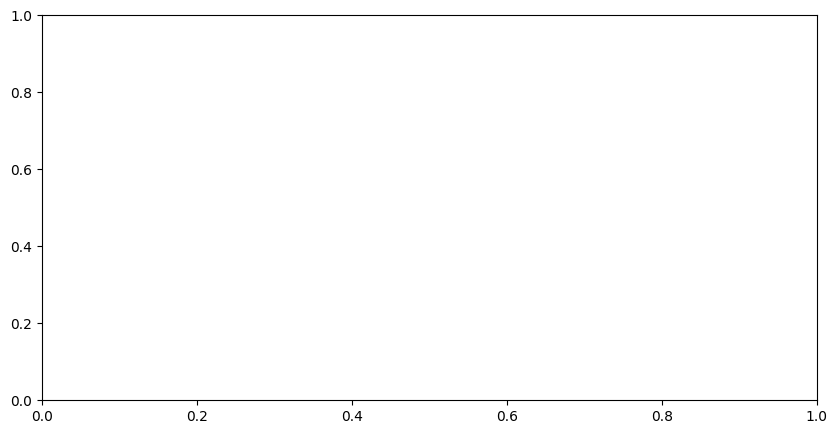

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue_yearly = tesla_revenue(tesla_revenue["Date"].dt.year)

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Value")

plt.tight_layout()

plt.show()